In [57]:
## CONVERT TO JSON

In [58]:
import zipfile
import io
import os
import json
from google.colab import files

In [59]:
uploaded = files.upload()

Saving Technology.zip to Technology (1).zip


In [60]:
zip_file_name = list(uploaded.keys())[0]


In [61]:
with zipfile.ZipFile(io.BytesIO(uploaded[zip_file_name]), 'r') as zip_ref:
    zip_ref.extractall('data')

In [62]:
text_files = [f for f in os.listdir('data') if f.endswith('.txt')]

In [63]:
consolidated_data = {}

for file_name in text_files:
    with open(os.path.join('data', file_name), 'r') as file:
        content = file.read()
        consolidated_data[file_name] = content

In [64]:
json_file_name = 'consolidated_data.json'
with open(json_file_name, 'w') as json_file:
    json.dump(consolidated_data, json_file)

In [65]:
files.download(json_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
### COUNTING CHARACTERS

In [68]:
characters_count = {}

In [69]:
for file_name in text_files:
    with open(os.path.join('data', file_name), 'r') as file:
        content = file.read()
        characters_count[file_name] = len(content)

In [70]:
for file_name, count in characters_count.items():
    print(f"{file_name}: {count} characters")

Activision Blizzard_Kotick_2020.txt: 21063 characters
Comcast_Roberts_2022.txt: 3653 characters
J.B. Hunt Transport Services_Roberts_2021.txt: 12587 characters
Texas Instruments_Templeton_2021.txt: 6891 characters
Nvidia_Huang_2021.txt: 20377 characters
Paccar_Feight_2022.txt: 14149 characters
Avantor_Stubblefield_2021.txt: 4577 characters
Ebay_Lannone_2020.txt: 14790 characters
Leidos Holdings_Krone_2021.txt: 5331 characters
Las Vegas Sands_Goldstein_2022.txt: 5309 characters
Netflix_None_2021.txt: 15803 characters
Howmet Aerospace_Plant_2020.txt: 4198 characters
Hewlett Packard Enterprise_Neri_2021.txt: 6327 characters
Fox_Murdoch_2020.txt: 4422 characters
Xerox Holdings_Visentin_2021.txt: 6679 characters
HP_Lores_2021.txt: 6965 characters
Lam Research_Archer_2021.txt: 6303 characters
Apple_Cook_2019.txt: 8446 characters
3M_Roman_2020.txt: 11819 characters
Motorola Solutions_Brown_2022.txt: 3395 characters
Intuit_Goodarzi_2021.txt: 4092 characters
Fiserv_Bisignano_2021.txt: 15384 cha

In [71]:
### ORDERING LIST FROM LARGEST TO SMALLEST

char_count_list = [(file_name, len(content)) for file_name, content in consolidated_data.items()]


In [72]:
char_count_list_sorted = sorted(char_count_list, key=lambda x: x[1], reverse=True)

In [73]:
for file_name, count in char_count_list_sorted:
    print(f"{file_name}: {count} characters")

Microsoft_Nadella_2021.txt: 24934 characters
Amazon_Bezos_2020.txt: 23950 characters
Activision Blizzard_Kotick_2020.txt: 21063 characters
Nvidia_Huang_2021.txt: 20377 characters
ATT_Stankey_2021.txt: 19699 characters
Old Republic International_Smiddy_2021.txt: 16505 characters
Adobe_Narayen_2022.txt: 16455 characters
Netflix_None_2021.txt: 15803 characters
Fiserv_Bisignano_2021.txt: 15384 characters
Ebay_Lannone_2020.txt: 14790 characters
Verizon Communication_Vestberg_2021.txt: 14437 characters
Cerner_Feinberg_2021.txt: 14346 characters
Paccar_Feight_2022.txt: 14149 characters
Thermo Fisher Scientific_Casper_2021.txt: 13639 characters
Cognizant_Humphries_2021.txt: 13263 characters
J.B. Hunt Transport Services_Roberts_2021.txt: 12587 characters
Raytheon_Hayes_2021.txt: 11865 characters
3M_Roman_2020.txt: 11819 characters
L3Harris Technologies_Kubasik_2021.txt: 10968 characters
Becton Dickinson_Polen_2021.txt: 10732 characters
IBM_Krishna_2021.txt: 10247 characters
News Corp_Thomson_20

In [ ]:
### PLOTTING DOCUMENTS BY YEAR

In [74]:
# Extracting year from each document name
document_years = {}

for file_name in consolidated_data.keys():
    if file_name.endswith(".txt"):
        year = file_name[-8:-4]
        document_years[file_name] = year
    else:
        print(f"No year found for: {file_name}")

for file_name, year in document_years.items():
    print(f"{file_name}: {year}")

Activision Blizzard_Kotick_2020.txt: 2020
Comcast_Roberts_2022.txt: 2022
J.B. Hunt Transport Services_Roberts_2021.txt: 2021
Texas Instruments_Templeton_2021.txt: 2021
Nvidia_Huang_2021.txt: 2021
Paccar_Feight_2022.txt: 2022
Avantor_Stubblefield_2021.txt: 2021
Ebay_Lannone_2020.txt: 2020
Leidos Holdings_Krone_2021.txt: 2021
Las Vegas Sands_Goldstein_2022.txt: 2022
Netflix_None_2021.txt: 2021
Howmet Aerospace_Plant_2020.txt: 2020
Hewlett Packard Enterprise_Neri_2021.txt: 2021
Fox_Murdoch_2020.txt: 2020
Xerox Holdings_Visentin_2021.txt: 2021
HP_Lores_2021.txt: 2021
Lam Research_Archer_2021.txt: 2021
Apple_Cook_2019.txt: 2019
3M_Roman_2020.txt: 2020
Motorola Solutions_Brown_2022.txt: 2022
Intuit_Goodarzi_2021.txt: 2021
Fiserv_Bisignano_2021.txt: 2021
News Corp_Thomson_2021.txt: 2021
Raytheon_Hayes_2021.txt: 2021
Thermo Fisher Scientific_Casper_2021.txt: 2021
General Dynamics_Novakovic_2021.txt: 2021
Alphabet_Pichai_2020.txt: 2020
Verizon Communication_Vestberg_2021.txt: 2021
IBM_Krishna_2

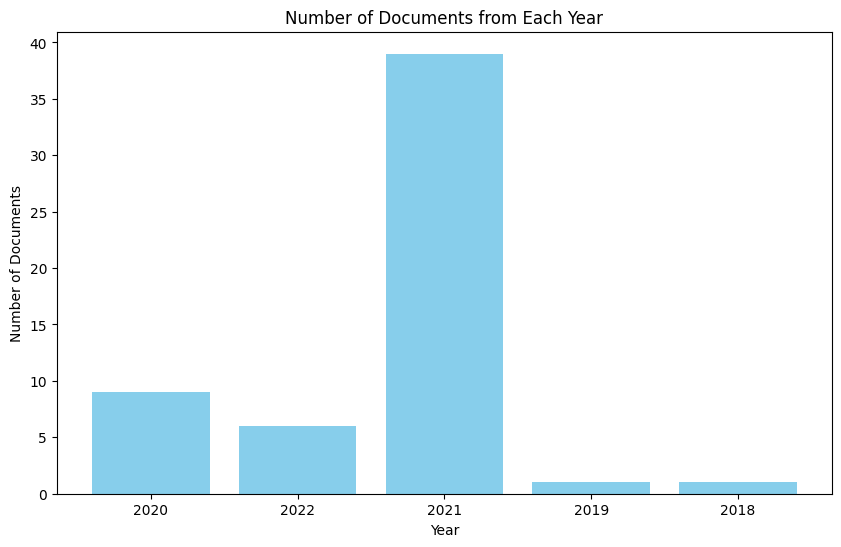

In [75]:
import matplotlib.pyplot as plt

year_counts = {}
for year in document_years.values():
    year_counts[year] = year_counts.get(year, 0) + 1

years = list(year_counts.keys())
counts = list(year_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(years, counts, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Documents')
plt.title('Number of Documents from Each Year')
plt.show()

In [ ]:
### BASIC SENTIMENT ANALYSIS

In [76]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

document_sentiments = {}

for file_name, content in consolidated_data.items():
    sentiment_score = sid.polarity_scores(content)
    sentiment_score = {key: sentiment_score[key] for key in ['neg', 'neu', 'pos']}
    document_sentiments[file_name] = sentiment_score

for file_name, sentiment_score in document_sentiments.items():
    print(f"{file_name}: {sentiment_score}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Activision Blizzard_Kotick_2020.txt: {'neg': 0.019, 'neu': 0.75, 'pos': 0.231}
Comcast_Roberts_2022.txt: {'neg': 0.009, 'neu': 0.809, 'pos': 0.182}
J.B. Hunt Transport Services_Roberts_2021.txt: {'neg': 0.023, 'neu': 0.768, 'pos': 0.209}
Texas Instruments_Templeton_2021.txt: {'neg': 0.015, 'neu': 0.706, 'pos': 0.278}
Nvidia_Huang_2021.txt: {'neg': 0.023, 'neu': 0.857, 'pos': 0.12}
Paccar_Feight_2022.txt: {'neg': 0.006, 'neu': 0.847, 'pos': 0.147}
Avantor_Stubblefield_2021.txt: {'neg': 0.009, 'neu': 0.789, 'pos': 0.202}
Ebay_Lannone_2020.txt: {'neg': 0.01, 'neu': 0.76, 'pos': 0.231}
Leidos Holdings_Krone_2021.txt: {'neg': 0.02, 'neu': 0.8, 'pos': 0.181}
Las Vegas Sands_Goldstein_2022.txt: {'neg': 0.014, 'neu': 0.817, 'pos': 0.169}
Netflix_None_2021.txt: {'neg': 0.035, 'neu': 0.821, 'pos': 0.144}
Howmet Aerospace_Plant_2020.txt: {'neg': 0.02, 'neu': 0.791, 'pos': 0.19}
Hewlett Packard Enterprise_Neri_2021.txt: {'neg': 0.026, 'neu': 0.812, 'pos': 0.162}
Fox_Murdoch_2020.txt: {'neg': 0.012

In [ ]:
## Check sentiment scores for a specific document

In [ ]:
### TOPIC MODELING

In [78]:
!pip install bertopic

from bertopic import BERTopic
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 54.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 22.2 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/73

In [86]:
import nltk
nltk.download('stopwords')
# Step 1: Prepare the data (including removing stopwords and punctuation)
stop_words = set(stopwords.words('english'))
custom_stop_words = {"one", "year", "us", "also"}  # Exclude specific stopwords
stop_words.update(custom_stop_words)

documents_per_company_preprocessed = []

for company_name in consolidated_data.keys():
    # Join the content of all files for each company into a single string
    documents = ' '.join([str(content) for file_name, content in consolidated_data.items() if company_name in file_name])

    # Remove stopwords and punctuation
    documents_cleaned = ' '.join(word for word in documents.split() if word.lower() not in stop_words
                                 and word.lower() not in string.punctuation)

    documents_per_company_preprocessed.append(documents_cleaned)

# Step 2: Apply topic modeling (BERTopic) on preprocessed data
topic_model = BERTopic()
topics, _ = topic_model.fit_transform(documents_per_company_preprocessed)

# Get the topic names
topic_names = topic_model.get_topics()

# Extract numerical values representing years from the documents
years = [word for document in documents_per_company_preprocessed for word in document.split() if word.isdigit()]

# Keep track of words already assigned to topics
assigned_words = set()

# Print out the names of each topic
for topic_id, topic_words in topic_names.items():
    words = []
    for word, _ in topic_words:
        # Exclude words identified as years
        if word not in years and word not in assigned_words and len(words) < 5:
            words.append(word)
            assigned_words.add(word)

    # If the topic does not have 5 unique words, add additional words from the existing list
    while len(words) < 5:
        for word, _ in topic_words:
            if word not in words and word not in years and len(words) < 5:
                words.append(word)

    print(f"Topic {topic_id}: {', '.join(words)}")  # Print the words for each topic


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic -1: customers, new, work, business, billion
Topic 0: growth, paccar, company, million, insurance
Topic 1: clients, ibm, solutions, 3m, year
